# Install and Import property

In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Making key point using Open CV

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
#mp_holistic??

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
cv2.cvtColor??

In [18]:
draw_landmarks(frame, results)

In [20]:
mp.python.solutions.holistic??

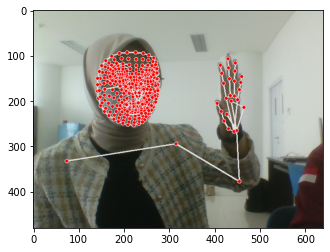

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract keypoint

In [21]:
len(results.left_hand_landmarks.landmark)

21

In [22]:
results.left_hand_landmarks.landmark[0]

x: 0.693395
y: 0.5576815
z: 3.5175583e-07

In [23]:
len(results.face_landmarks.landmark)

468

In [24]:
results.face_landmarks.landmark[0]

x: 0.35844517
y: 0.41703084
z: -0.027394198

In [26]:
len(results.pose_landmarks.landmark)

33

In [27]:
results.pose_landmarks.landmark[0]

x: 0.36280352
y: 0.4263164
z: -0.5844049
visibility: 0.9999056

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [93]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [27]:
result_test

NameError: name 'result_test' is not defined

# Setup Folders for Collection

In [9]:
# Path for exported data, numpy arrays

DATA_PATH = os.path.join('C:\\Users\\alpian\\taSignLanguage','MP_Data')

# Actions that we try to detect
actions = np.array(['apa', 'dimana', 'kapan'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
pwd

# Collect Keypoint Values for Training and Testing

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'extract_keypoints' is not defined

In [11]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'apa': 0, 'dimana': 1, 'kapan': 2}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
X = np.array(sequences)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback], validation_data=(X_test,y_test))

Epoch 1/200
3/3 [==============================] - 7s 454ms/step - loss: 5.6088 - accuracy: 0.3472 - val_loss: 8.0339 - val_accuracy: 0.3333
Epoch 2/200
3/3 [==============================] - 0s 81ms/step - loss: 7.5078 - accuracy: 0.4583 - val_loss: 3.7314 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 84ms/step - loss: 21.3101 - accuracy: 0.3194 - val_loss: 49.3925 - val_accuracy: 0.2778
Epoch 4/200
3/3 [==============================] - 0s 87ms/step - loss: 26.0297 - accuracy: 0.2083 - val_loss: 30.2060 - val_accuracy: 0.1667
Epoch 5/200
3/3 [==============================] - 0s 85ms/step - loss: 22.8944 - accuracy: 0.2639 - val_loss: 10.8424 - val_accuracy: 0.3889
Epoch 6/200
3/3 [==============================] - 0s 86ms/step - loss: 10.8618 - accuracy: 0.2917 - val_loss: 7.2163 - val_accuracy: 0.4444
Epoch 7/200
3/3 [==============================] - 0s 92ms/step - loss: 9.2502 - accuracy: 0.3333 - val_loss: 10.1801 - val_accuracy: 0.2778
Epoch 8/200

3/3 [==============================] - 0s 85ms/step - loss: 160.3644 - accuracy: 0.4444 - val_loss: 40.1824 - val_accuracy: 0.6667
Epoch 59/200
3/3 [==============================] - 0s 90ms/step - loss: 57.8210 - accuracy: 0.5139 - val_loss: 224.1856 - val_accuracy: 0.2778
Epoch 60/200
3/3 [==============================] - 0s 80ms/step - loss: 235.1170 - accuracy: 0.3333 - val_loss: 549.4151 - val_accuracy: 0.2222
Epoch 61/200
3/3 [==============================] - 0s 83ms/step - loss: 403.1410 - accuracy: 0.3333 - val_loss: 243.6630 - val_accuracy: 0.2778
Epoch 62/200
3/3 [==============================] - 0s 84ms/step - loss: 193.6978 - accuracy: 0.3611 - val_loss: 149.3355 - val_accuracy: 0.1667
Epoch 63/200
3/3 [==============================] - 0s 91ms/step - loss: 155.5195 - accuracy: 0.3194 - val_loss: 537.8824 - val_accuracy: 0.2222
Epoch 64/200
3/3 [==============================] - 0s 90ms/step - loss: 361.3455 - accuracy: 0.3750 - val_loss: 255.6800 - val_accuracy: 0.4444


Epoch 115/200
3/3 [==============================] - 0s 83ms/step - loss: 54.2635 - accuracy: 0.3472 - val_loss: 93.4808 - val_accuracy: 0.3333
Epoch 116/200
3/3 [==============================] - 0s 79ms/step - loss: 77.3225 - accuracy: 0.3333 - val_loss: 60.8602 - val_accuracy: 0.2222
Epoch 117/200
3/3 [==============================] - 0s 77ms/step - loss: 55.0829 - accuracy: 0.3611 - val_loss: 71.4458 - val_accuracy: 0.4444
Epoch 118/200
3/3 [==============================] - 0s 86ms/step - loss: 80.1747 - accuracy: 0.3056 - val_loss: 74.2562 - val_accuracy: 0.2778
Epoch 119/200
3/3 [==============================] - 0s 78ms/step - loss: 83.1340 - accuracy: 0.2917 - val_loss: 66.5413 - val_accuracy: 0.2222
Epoch 120/200
3/3 [==============================] - 0s 83ms/step - loss: 62.9539 - accuracy: 0.2917 - val_loss: 65.8140 - val_accuracy: 0.4444
Epoch 121/200
3/3 [==============================] - 0s 79ms/step - loss: 101.6765 - accuracy: 0.3056 - val_loss: 39.3254 - val_accuracy

Epoch 172/200
3/3 [==============================] - 0s 85ms/step - loss: 28.6109 - accuracy: 0.3750 - val_loss: 39.5600 - val_accuracy: 0.3333
Epoch 173/200
3/3 [==============================] - 0s 79ms/step - loss: 52.4010 - accuracy: 0.3333 - val_loss: 30.8123 - val_accuracy: 0.4444
Epoch 174/200
3/3 [==============================] - 0s 82ms/step - loss: 28.1627 - accuracy: 0.3472 - val_loss: 63.9562 - val_accuracy: 0.3333
Epoch 175/200
3/3 [==============================] - 0s 77ms/step - loss: 48.0876 - accuracy: 0.3750 - val_loss: 40.0069 - val_accuracy: 0.3333
Epoch 176/200
3/3 [==============================] - 0s 79ms/step - loss: 18.0499 - accuracy: 0.4028 - val_loss: 55.8756 - val_accuracy: 0.2222
Epoch 177/200
3/3 [==============================] - 0s 80ms/step - loss: 48.9781 - accuracy: 0.3611 - val_loss: 45.7233 - val_accuracy: 0.4444
Epoch 178/200
3/3 [==============================] - 0s 88ms/step - loss: 63.7034 - accuracy: 0.2778 - val_loss: 104.7544 - val_accuracy

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make Predictions

In [110]:
res = model.predict(X_test)

1/1 [==============================] - 1s 672ms/step


In [111]:
actions[np.argmax(res[4])]

'kapan'

In [112]:
actions[np.argmax(y_test[4])]

'kapan'

# Save Weights

In [113]:
model.save('action.h5')

In [114]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [115]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [116]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [117]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [118]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  4]],

       [[ 9,  0],
        [ 9,  0]],

       [[ 4,  9],
        [ 0,  5]]], dtype=int64)

In [119]:
accuracy_score(ytrue, yhat)

0.5

# Test in Real Time

In [123]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
apa
<class 'mediapipe.python.solut

1/1 [==============================] - 0s 20ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
apa
<class 'mediapipe.python.solut

1/1 [==============================] - 0s 20ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
kapan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
apa
<class 'mediapipe.python.solution_

In [39]:
cap.release()
cv2.destroyAllWindows()